### This notebook covers:
* Series Structure, item count, NaNs
* Descriptive Statistics
* Series Arithmatics
* Sorting Series
* Filtering and Custom Transformation

### Revision:
* pd.read_csv(url, use_cols=[], index_col='col').sqeeze()
* Series Attributes:
    - s.size, s.shape, s.index, s.values
* Unique and Monotonicity:
    - s.is_unique,s.nunique(dropna=True), s.is_monotonic, s.is_monotonic_increasing, s.is_monotonic_decreasing
* Count:
    - s.count() = gives non na counts
* Accessing and Counting NAs:
    - s.hasnas,
    - s.isnull() = s.isna() = gives boolean mask series based on NA values
    - s.notnull() = s.notna() = gives boolean mask series based on not NA values.
    - s.size = s.isnull().sum() + s.count()
    - np.isnan = universal function, difference between sequential operation and vectorized operation on array
* Filling and Dropping NAs:
    - s.dropna(inplace=False), s.fillna(value, inplace=False)
* Descriptive Statistics:
    - s.mean(), s.std(), s.var(), s.median(), s.mode(), s.quantile(0.5), s.quantile(0.3), s.min(), s.max()
    - s.describe(include=float, exclude=object, percentiles=[0.20, 0.70])
    - s.hist() = to draw histogram
    - positive skewed = mean is significantly higher compared to meadian.
* value_counts, idxmax, idxmin:
    - s.value_counts(sort=True, ascending=True, dropna=True, normalize=False )  # normalize will give relative percentage.
    - s.idxmin(), s.idxmax() # only gives one first value
* Sorting:
    - s.sort_values(ascending=True, na_position='last',
                                kind='quicksort',   #  mergesort, heapsort
                                    inplace=False)
    - s.sort_index(ascending=True, na_position='last', inplace=False)
* s.nlargest(n), s.nsmallest(n)
* Series Arithmatic:
    - s+2, (s-10)*3
    - s+s2 or s.add(s2, fill_value=0),
    - s-s2 or s.subtract(s2, fill_value=0),
    - s*s2 or s.multiply(s2, fill_value=1),
    - s/s2 or s.divide(s2, fill_value=1)
* Cummulative arithmatic:
    - cumsum(skipna=True) = cummulative sum
    - cumprod(skipna=True) = cummulative product
    - cummin(skipna=True) = cummulative minimum
* Pairwise differences with diff(): s.diff(periods=1)
* Series Iteration:
    - for i in s:
        print(i) # gives value
    - for i in s.index:
        print(i) # gives index
    - for i in s.items():
        print(i) # gives tuple(index, value)
* Filtering with filter, where, and mask:
    - s.filter(regex='V'), s.filter(like='stan'), s.filter()
    - s[s>200], s.loc[s>200]
    - s.where(lambda x: x>200, other=NaN) # will give NaN where x<=200
    - s.mask(lambda x: x>200) # will give NaN where x>200
* Transforming with update(), apply(), map():
    - s['a'] = 34, s.update(pd.Series(data=[23, 45], index=['a', 'b']))
    - s.apply(lambda x: x**2), s.apply(np.square), s.apply(multiply_by_n, args=(a, b, c, ...))
    - s.map(dict/function,na_action='ignore'/None) # to substitute a values from dict/function
* z score = (x-mean)/stddev = relatively large/small.

### Reading data from csv

In [2]:
import pandas as pd
pd.read_csv('https://andybek.com/pandas-drinks')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [3]:
pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country','wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [4]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country','wine_servings'], index_col='country').squeeze()

# squeeze() will return series if only one column is there, else dataframe.

print(type(alcohol))
alcohol.head()

<class 'pandas.core.series.Series'>


country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

### Series size, shape and len()

In [5]:
print(alcohol.index, alcohol.values,sep='\n')
print(alcohol.index.size, alcohol.values.size, alcohol.size)

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)
[ nan  54.  14. 312.  45.  45. 221.  11. 212. 191.   5.  51.   7.  nan
  36.  42. 212.   8.  13.  nan   8.   8.  35.  16.   1.  94.   7.  nan
   7.  16.   1.   4.   1.   1.   1. 172.   8.   3.   1.   9.  74.  11.
 254.   5. 113. 134.  nan   1. 278.   3.  26.   9.   3.   1.   2. 233.
  nan  59.  nan   1.  97.  37.  59.   1. 149. 175.   1. 218.  28.   2.
   2.  21.   1.   1.   2. 185.  78.  nan  nan  nan  nan 165.   9. 237.
   9.  16.   1.  12.   2.   1.  nan   6. 123.  62.  31.  nan   2.  nan
  56. 271.   4.   1.  nan  nan   1.  12.  nan  nan  18.   5.  18.  nan
   8. 128.   1.   5.  nan   1.   8.  nan  19. 175.   1.   1.   2.   7.
 129.   1.  nan  23.  18.   1.  74

In [6]:
alcohol.shape

(193,)

In [7]:
len(alcohol)

193

### Unique values and Series monotonicity

In [8]:
print(alcohol.is_unique)
print(alcohol.head().is_unique)
print(alcohol.nunique())
print(alcohol.nunique(dropna=False))

False
True
71
72


In [9]:
pd.Series([1,2,3,3,3,6,34,55]).is_monotonic

True

In [10]:
pd.Series([1,2,3,3,3,6,34,55,6]).is_monotonic

False

In [11]:
print(pd.Series(reversed([1,2,3,3,3,6,34,55])).is_monotonic_increasing)
print(pd.Series(reversed([1,2,3,3,3,6,34,55])).is_monotonic_decreasing)

False
True


### Count

In [12]:
alcohol.count(), alcohol.size, alcohol.hasnans
# count returns only non NA/NULL data counts

(162, 193, True)

### Accessing and Counting NAs

In [13]:
alcohol.isnull(), type(alcohol.isnull())

(country
 Afghanistan     True
 Albania        False
 Algeria        False
 Andorra        False
 Angola         False
                ...  
 Venezuela      False
 Vietnam        False
 Yemen           True
 Zambia         False
 Zimbabwe       False
 Name: wine_servings, Length: 193, dtype: bool,
 pandas.core.series.Series)

In [14]:
alcohol[alcohol.isnull()]

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [15]:
alcohol[alcohol.isnull()].index

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [16]:
len(alcohol[alcohol.isnull()].index), alcohol.isnull().sum()

(31, 31)

In [17]:
all_ = alcohol.size
nonnulls = alcohol.count()
nulls = alcohol.isnull().sum()  
all_ == nonnulls + nulls

True

In [18]:
# isna() and isnull() is alias.

In [19]:
import numpy as np
# sequencial = running operations on array one by one
# vectorized = running operations on entire array  --> used in numpy
# ufunc --> universal function

In [20]:
np.isnan

<ufunc 'isnan'>

In [21]:
ser = pd.Series(data=[True,False, None, 2],dtype='float')
np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [22]:
alcohol[np.isnan].size

31

In [23]:
# notnulll / notna
alcohol.loc[alcohol.notnull()]

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [24]:
alcohol.notnull().sum(), alcohol.notna().sum()

(162, 162)

In [25]:
True + 10, False + 10 # bool type is subclass of int

(11, 10)

In [26]:
bool.__mro__

(bool, int, object)

In [27]:
wine_servings = alcohol[alcohol.notnull()]

In [28]:
print(wine_servings.sum())   # total wine consumed

8221.0


In [29]:
print(wine_servings.loc[[True if wine_servings[i]<100 else False for i in range(wine_servings.size)]])
print(wine_servings[wine_servings<100].size)

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 132, dtype: float64
132


### Dropping and Filling NAs

In [30]:
alcohol.dropna()  # doesn't change original series. alcohol.dropna(inplace=True)

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [31]:
alcohol.fillna(100, inplace=False)

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

### Descriptive Statistics

In [32]:
# na will be excluded in calculation
print(alcohol.sum())
print(alcohol.mean())
print(alcohol.median())
print(alcohol.quantile(0.5))
print(alcohol.quantile(0.3))

8221.0
50.74691358024691
11.5
11.5
5.0


In [33]:
# positive skew and negetive skew
# positive skew = mean is significantly higher than median

<AxesSubplot:>

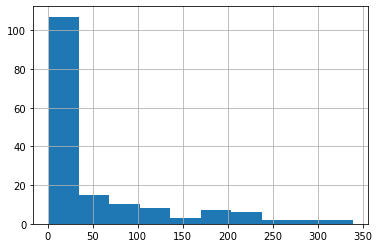

In [34]:
alcohol.hist()

In [35]:
# IQR = Interquartile Range
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)
iqr

58.25

In [36]:
alcohol.min(), alcohol.max()

(1.0, 339.0)

In [37]:
alcohol.std(), alcohol.var()

(76.13491716376173, 5796.52561153286)

In [38]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [39]:
alcohol.describe(percentiles=[.79,.19])

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [40]:
alcohol.describe(include=float, exclude=object)

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

### Mode and value_counts

In [41]:
alcohol.mode()

0    1.0
Name: wine_servings, dtype: float64

In [42]:
alcohol[alcohol==1].size

28

In [49]:
alcohol.value_counts(
    sort=True,
    ascending=False,
    dropna=True,
    normalize=False    # True gives relative percentage
)

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

### idxmax() and idxmin()

In [47]:
alcohol.idxmax(), alcohol.idxmin()   # only first label is returned

('Portugal', 'Brunei')

In [48]:
alcohol[alcohol == alcohol.max()].index[0]

'Portugal'

### Sorting

In [105]:
alcohol.sort_values(
    ascending=False,
    na_position='last',
    kind='quicksort',   #  mergesort, heapsort
    inplace=False
)

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [113]:
alcohol.sort_index(ascending=True, na_position='first', inplace=False)

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

### nlargest() and nsmallest()

In [106]:
alcohol.sort_values(
    ascending=False
)[:7]

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
Croatia       254.0
Italy         237.0
Name: wine_servings, dtype: float64

In [107]:
alcohol.nlargest(7)

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
Croatia       254.0
Italy         237.0
Name: wine_servings, dtype: float64

In [108]:
alcohol.nsmallest(7)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Name: wine_servings, dtype: float64

In [115]:
# Challenge:
#1 - get all countries and their values which are >50.
fifty_plus = alcohol[alcohol>50]
#2 - smallest 20 from fifty_plus
sample = fifty_plus.nsmallest(20)
print(sample)
#3 - find mean, median and std deviation from sample
print(sample.mean(), sample.median(), sample.std())

country
Bahamas                51.0
Seychelles             51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Estonia                59.0
Gabon                  59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Cook Islands           74.0
Paraguay               74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64
74.25 73.5 19.07292100831631


### Series Arithmatic and fill value

In [116]:
alcohol + 2

country
Afghanistan      NaN
Albania         56.0
Algeria         16.0
Andorra        314.0
Angola          47.0
               ...  
Venezuela        5.0
Vietnam          3.0
Yemen            NaN
Zambia           6.0
Zimbabwe         6.0
Name: wine_servings, Length: 193, dtype: float64

In [117]:
(alcohol - 10)*2

country
Afghanistan      NaN
Albania         88.0
Algeria          8.0
Andorra        604.0
Angola          70.0
               ...  
Venezuela      -14.0
Vietnam        -18.0
Yemen            NaN
Zambia         -12.0
Zimbabwe       -12.0
Name: wine_servings, Length: 193, dtype: float64

In [118]:
more_drinks = pd.Series({'Albania': 60})
alcohol + more_drinks

Afghanistan      NaN
Albania        114.0
Algeria          NaN
Andorra          NaN
Angola           NaN
               ...  
Venezuela        NaN
Vietnam          NaN
Yemen            NaN
Zambia           NaN
Zimbabwe         NaN
Length: 193, dtype: float64

In [120]:
alcohol.add(more_drinks, fill_value=0)

Afghanistan      NaN
Albania        114.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [121]:
alcohol - more_drinks

Afghanistan    NaN
Albania       -6.0
Algeria        NaN
Andorra        NaN
Angola         NaN
              ... 
Venezuela      NaN
Vietnam        NaN
Yemen          NaN
Zambia         NaN
Zimbabwe       NaN
Length: 193, dtype: float64

In [124]:
alcohol.subtract(more_drinks,fill_value=0)

Afghanistan      NaN
Albania         -6.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [127]:
print(alcohol*more_drinks)
print(alcohol.multiply(more_drinks, fill_value=1))

Afghanistan       NaN
Albania        3240.0
Algeria           NaN
Andorra           NaN
Angola            NaN
                ...  
Venezuela         NaN
Vietnam           NaN
Yemen             NaN
Zambia            NaN
Zimbabwe          NaN
Length: 193, dtype: float64
Afghanistan       NaN
Albania        3240.0
Algeria          14.0
Andorra         312.0
Angola           45.0
                ...  
Venezuela         3.0
Vietnam           1.0
Yemen             NaN
Zambia            4.0
Zimbabwe          4.0
Length: 193, dtype: float64


In [128]:
print(alcohol/more_drinks)
print(alcohol.divide(more_drinks,fill_value=1))

Afghanistan    NaN
Albania        0.9
Algeria        NaN
Andorra        NaN
Angola         NaN
              ... 
Venezuela      NaN
Vietnam        NaN
Yemen          NaN
Zambia         NaN
Zimbabwe       NaN
Length: 193, dtype: float64
Afghanistan      NaN
Albania          0.9
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64


### Cummulative sum

In [50]:
alcohol.cumsum(skipna=True)

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [131]:
alcohol.prod()  # product of all servings

3.427611505218281e+183

In [132]:
alcohol.cumprod()

country
Afghanistan              NaN
Albania         5.400000e+01
Algeria         7.560000e+02
Andorra         2.358720e+05
Angola          1.061424e+07
                   ...      
Venezuela      2.142257e+182
Vietnam        2.142257e+182
Yemen                    NaN
Zambia         8.569029e+182
Zimbabwe       3.427612e+183
Name: wine_servings, Length: 193, dtype: float64

In [133]:
alcohol.cummin()

country
Afghanistan     NaN
Albania        54.0
Algeria        14.0
Andorra        14.0
Angola         14.0
               ... 
Venezuela       1.0
Vietnam         1.0
Yemen           NaN
Zambia          1.0
Zimbabwe        1.0
Name: wine_servings, Length: 193, dtype: float64

In [134]:
alcohol.cummin()

country
Afghanistan     NaN
Albania        54.0
Algeria        14.0
Andorra        14.0
Angola         14.0
               ... 
Venezuela       1.0
Vietnam         1.0
Yemen           NaN
Zambia          1.0
Zimbabwe        1.0
Name: wine_servings, Length: 193, dtype: float64

### Pairwise differences with diff()

In [135]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [136]:
alcohol.diff().head()

country
Afghanistan      NaN
Albania          NaN
Algeria        -40.0
Andorra        298.0
Angola        -267.0
Name: wine_servings, dtype: float64

In [137]:
alcohol.diff(periods=2).head()

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        258.0
Angola          31.0
Name: wine_servings, dtype: float64

In [138]:
alcohol.diff(periods=-1).head()

country
Afghanistan      NaN
Albania         40.0
Algeria       -298.0
Andorra        267.0
Angola           0.0
Name: wine_servings, dtype: float64

### Series Iteration

In [145]:
for i in alcohol.head():
    print(i)
for i in alcohol.head().index:
    print(i)
    print(alcohol[i])
for i in alcohol.head().items():  # iteritems() identical with items()
    print(i)

nan
54.0
14.0
312.0
45.0
Afghanistan
nan
Albania
54.0
Algeria
14.0
Andorra
312.0
Angola
45.0
('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)


### Filtering with filter(), where() and mask()

In [147]:
alcohol.filter(regex='V'), alcohol.filter(like='stan')

(country
 Cabo Verde                      16.0
 St. Vincent & the Grenadines    11.0
 Vanuatu                         11.0
 Venezuela                        3.0
 Vietnam                          1.0
 Name: wine_servings, dtype: float64,
 country
 Afghanistan      NaN
 Kazakhstan      12.0
 Kyrgyzstan       6.0
 Pakistan         NaN
 Tajikistan       NaN
 Turkmenistan    32.0
 Uzbekistan       8.0
 Name: wine_servings, dtype: float64)

In [150]:
alcohol[alcohol>300], alcohol.loc[alcohol>300]

(country
 Andorra     312.0
 Portugal    339.0
 Name: wine_servings, dtype: float64,
 country
 Andorra     312.0
 Portugal    339.0
 Name: wine_servings, dtype: float64)

In [152]:
alcohol.where(lambda x: x>200, other='too small') # default for other = NaN 

country
Afghanistan    too small
Albania        too small
Algeria        too small
Andorra            312.0
Angola         too small
                 ...    
Venezuela      too small
Vietnam        too small
Yemen          too small
Zambia         too small
Zimbabwe       too small
Name: wine_servings, Length: 193, dtype: object

In [154]:
alcohol.mask(lambda x: x>200)   # will give NaN inplace of x> 200.

country
Afghanistan     NaN
Albania        54.0
Algeria        14.0
Andorra         NaN
Angola         45.0
               ... 
Venezuela       3.0
Vietnam         1.0
Yemen           NaN
Zambia          4.0
Zimbabwe        4.0
Name: wine_servings, Length: 193, dtype: float64

### Transforming with update(), apply() and map()

In [155]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [156]:
alcohol['Albania'] = 19

In [157]:
alcohol.head()

country
Afghanistan      NaN
Albania         19.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [158]:
alcohol.update(pd.Series(data=[200,20],index=['Albania','Algeria']))

In [159]:
alcohol.head()

country
Afghanistan      NaN
Albania        200.0
Algeria         20.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [160]:
alcohol.apply(lambda x: x**2)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [162]:
alcohol.apply(np.square)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [163]:
def square_with_min(x, min_servings):
    if x< min_servings:
        return x**2
    return x

In [164]:
alcohol.apply(square_with_min, min_servings=200)

country
Afghanistan       NaN
Albania         200.0
Algeria         400.0
Andorra         312.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [165]:
alcohol.apply(square_with_min, args=(200,))

country
Afghanistan       NaN
Albania         200.0
Algeria         400.0
Andorra         312.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [170]:
alcohol.map(np.square)  # map substitutes series values with others from a function, series or dict

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [207]:
# Challenge:

#1 beer servings -
beers = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country','beer_servings'], index_col='country').squeeze()
beers.head()
print(type(beers))

<class 'pandas.core.series.Series'>


In [208]:
#2 calculate mean, meadian and stddev. check if distribution is right, left skewed.
beers.describe()  # if is righ skewed/positively skewed

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

In [210]:
#3 slice 10 records. Are they relatively large/small? 

(beers[:10]-beers.mean()).apply(lambda x: 'low' if x < 0 else 'high').value_counts()

high    6
low     4
Name: beer_servings, dtype: int64

### Z-score = (x-mean)/stddev

In [211]:
beers[:10].apply(lambda x: (x-beers.mean())/beers.std())

country
Afghanistan               NaN
Albania             -0.137818
Algeria             -0.773712
Andorra              1.412174
Angola               1.133970
Antigua & Barbuda   -0.902878
Argentina            0.895510
Armenia             -0.813455
Australia            1.571147
Austria              1.749992
Name: beer_servings, dtype: float64

In [213]:
z_scores = ((beers - beers.mean())/beers.std())

In [214]:
z_scores.max(), z_scores.min()

(2.7137689844109123, -1.012172141315241)